# 1. Importing the Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)             # To get diffent different colors
pd.set_option('display.max_columns', None)  # To display the max columns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,\
                            precision_score,\
                            recall_score,\
                            f1_score,\
                            classification_report,\
                            roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# 2. load the data 

In [4]:
data=pd.read_csv(r"C:\Users\RAJESH\OneDrive\Datascience\data files\Preprocessed_data.csv")
data.head()

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,0,0,16,0,1,0,1,1,0,0,1,1,1,1,65.6,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,1,0,10,0,0,0,0,0,1,1,0,0,0,1,-4.0,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,0,2,30,0,0,1,0,0,0,0,1,0,1,0,73.9,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,0,2,4,0,1,1,0,1,1,0,1,0,1,0,98.0,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,0,2,11,0,0,0,1,1,0,0,1,0,1,1,83.9,267.40,0.00,0,22.14,289.54,0


# 3. Data Preprocessing (EDA and Data Manipulation):-

In [5]:
#checking the data types
data.dtypes

Gender                                 int64
Age                                    int64
Married                                int64
Number of Dependents                   int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                  int64
Avg Monthly Long Distance Charges    float64
Multiple Lines                         int64
Internet Type                          int64
Avg Monthly GB Download                int64
Online Security                        int64
Online Backup                          int64
Device Protection Plan                 int64
Premium Tech Support                   int64
Streaming TV                           int64
Streaming Movies                       int64
Streaming Music                        int64
Unlimited Data                         int64
Contract                               int64
Paperless 

In [7]:
# checking the shape of the dataset
data.shape

(4835, 31)

In [10]:
# checking for null values
data.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges            

In [11]:
# to display column names
data.columns


Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'Latitude',
       'Longitude', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status'],
      dtype='object')

In [19]:
# statistic summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4835 non-null   int64  
 1   Age                                4835 non-null   int64  
 2   Married                            4835 non-null   int64  
 3   Number of Dependents               4835 non-null   int64  
 4   Latitude                           4835 non-null   float64
 5   Longitude                          4835 non-null   float64
 6   Number of Referrals                4835 non-null   int64  
 7   Tenure in Months                   4835 non-null   int64  
 8   Offer                              4835 non-null   int64  
 9   Avg Monthly Long Distance Charges  4835 non-null   float64
 10  Multiple Lines                     4835 non-null   int64  
 11  Internet Type                      4835 non-null   int64

In [27]:
data.describe()

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
count,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.00000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000
mean,0.501551,47.761117,0.486660,0.376008,36.128008,-119.692729,1.894519,33.042399,1.388418,25.561456,0.543744,1.503413,26.08666,0.359049,0.443020,0.437849,0.362978,0.500931,0.503413,0.456670,0.861634,0.652740,0.690383,0.401241,80.309576,2901.116825,2.081018,8.694933,848.093721,3755.824461,0.671975
std,0.500049,17.302674,0.499874,0.875636,2.475271,2.152471,2.940740,24.635247,1.813191,14.241440,0.498134,0.706184,19.56099,0.479771,0.496794,0.496174,0.480908,0.500051,0.500040,0.498171,0.345320,0.815899,0.462384,0.565084,21.379639,2415.426659,8.135292,28.059813,864.475933,3087.351791,0.469542
min,0.000000,19.000000,0.000000,0.000000,32.555828,-124.301372,0.000000,1.000000,0.000000,1.010000,0.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,42.900000,0.000000,0.000000,1.130000,46.920000,0.000000
25%,0.000000,33.000000,0.000000,0.000000,33.954017,-121.723877,0.000000,9.000000,0.000000,13.040000,0.000000,1.000000,13.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,69.400000,659.550000,0.000000,0.000000,139.975000,899.480000,0.000000
50%,1.000000,47.000000,0.000000,0.000000,35.861928,-119.402525,0.000000,30.000000,0.000000,25.820000,1.000000,2.000000,21.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,81.700000,2347.900000,0.000000,0.000000,517.800000,3081.230000,1.000000
75%,1.000000,62.000000,1.000000,0.000000,38.123544,-117.898722,3.000000,56.000000,3.000000,37.970000,1.000000,2.000000,30.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,95.600000,4870.275000,0.000000,0.000000,1360.965000,6284.900000,1.000000
max,1.000000,80.000000,1.000000,8.000000,41.962127,-114.192901,11.000000,72.000000,5.000000,49.990000,1.000000,2.000000,85.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,118.750000,8684.800000,49.570000,150.000000,3536.640000,11979.340000,1.000000


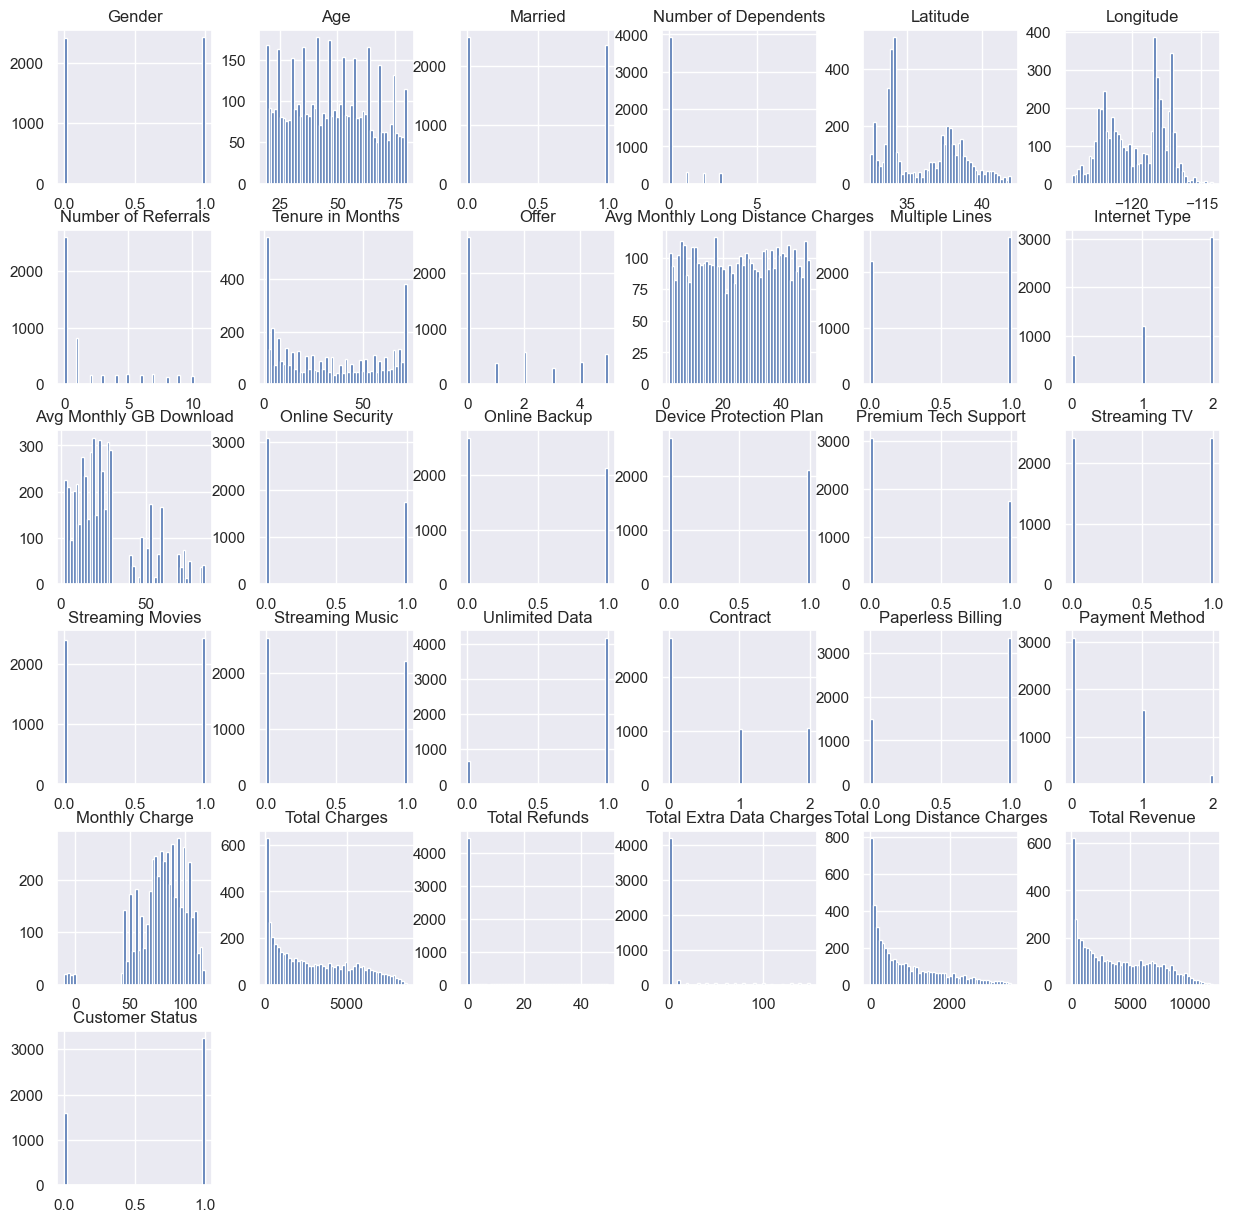

In [69]:
data.hist(bins=50,figsize=(15,15))
plt.show()

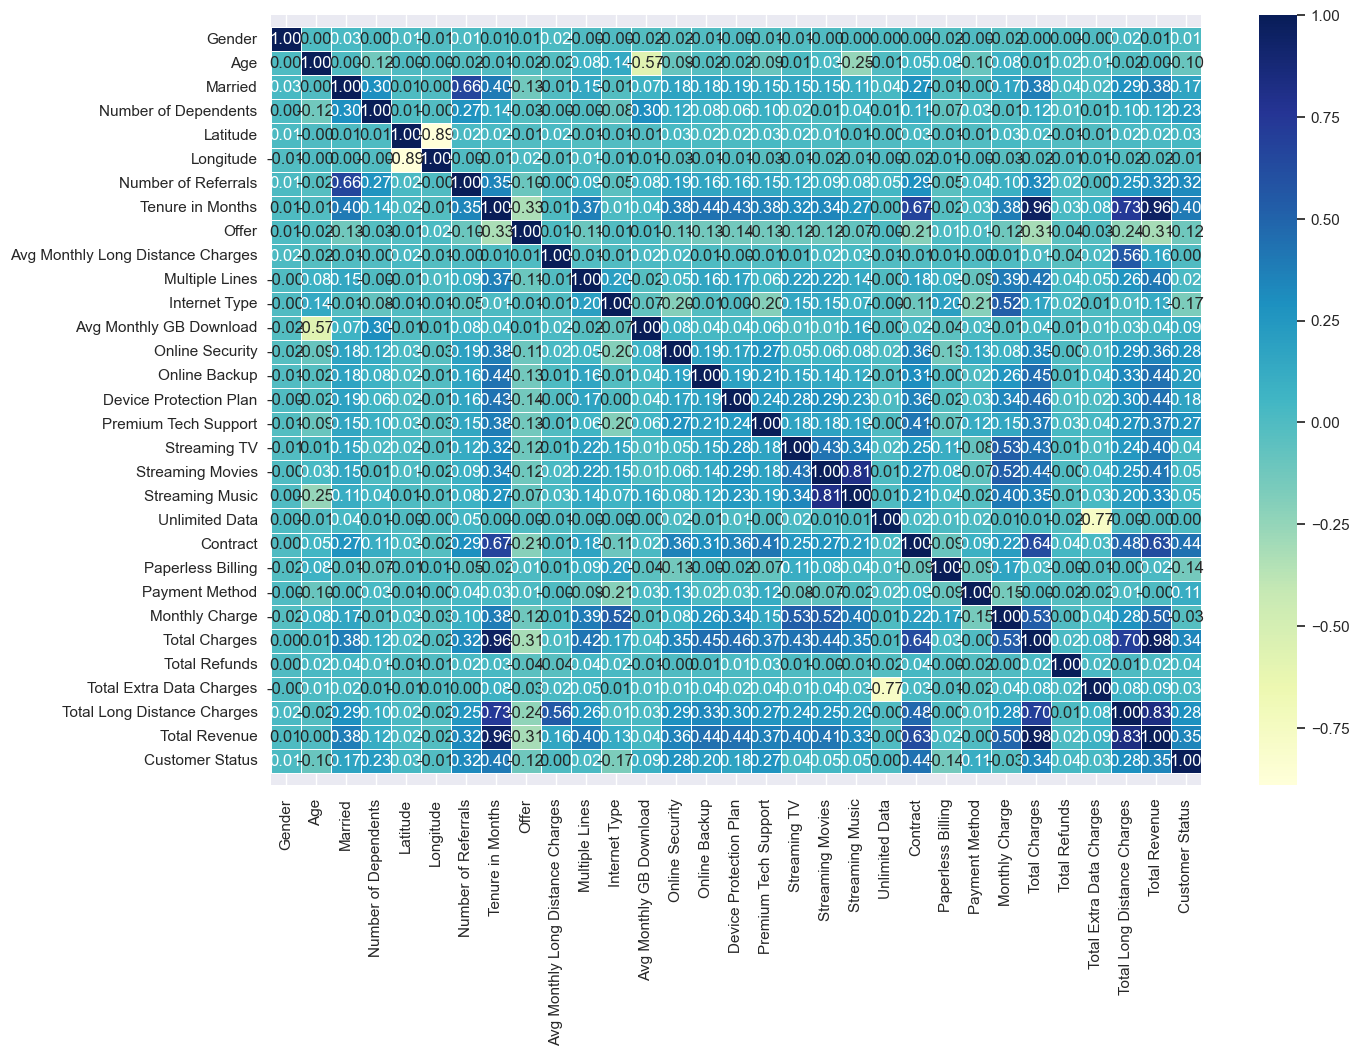

In [70]:
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# 4.model development

$step-1$ 

**Divide data into input and target data**

In [34]:
X=data.drop(["Customer Status"],axis=1)
y=data["Customer Status"]

In [35]:
X.head()

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,0,0,16,0,1,0,1,1,0,0,1,1,1,1,65.6,593.30,0.00,0,381.51,974.81
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,1,0,10,0,0,0,0,0,1,1,0,0,0,1,-4.0,542.40,38.33,10,96.21,610.28
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,0,2,30,0,0,1,0,0,0,0,1,0,1,0,73.9,280.85,0.00,0,134.60,415.45
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,0,2,4,0,1,1,0,1,1,0,1,0,1,0,98.0,1237.85,0.00,0,361.66,1599.51
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,0,2,11,0,0,0,1,1,0,0,1,0,1,1,83.9,267.40,0.00,0,22.14,289.54


In [30]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Customer Status, dtype: int64

In [36]:
X.shape

(4835, 30)

In [33]:
y.shape

(4835,)

In [37]:
# test size=0.2 , train data 80% and test data 20%
# random state=0 will split the data randomly

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(3868, 30)
(967, 30)
(3868,)
(967,)


$step-2$

**Removing the outliers using z-score**

In [39]:
from scipy import stats

In [41]:
# select the columns which you want remove outlier 
columns=['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[columns]))
# Set a threshold value for outlier detection (e.g., 3)
threshold=3
# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]
# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [42]:
X_train.head()

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
3739,1,71,1,0,33.902211,-117.914922,0,21,0,22.30,0,2,9,0,0,1,0,1,0,0,1,0,0,0,86.55,1857.25,0.0,0,468.30,2325.55
1551,1,21,0,0,37.587494,-121.862856,0,2,0,23.52,0,1,48,0,0,0,1,1,1,1,1,0,0,0,-8.00,132.40,0.0,0,47.04,179.44
1389,0,45,0,3,34.255203,-117.175654,0,18,4,42.45,1,1,28,1,0,0,0,0,1,1,1,0,0,0,64.80,1166.70,0.0,0,764.10,1930.80
2947,1,33,0,0,32.957195,-117.202542,0,30,0,30.06,0,2,19,0,0,0,0,1,1,1,1,0,1,0,90.25,2755.35,0.0,0,901.80,3657.15
2620,1,26,0,0,37.249377,-120.249581,0,37,3,38.72,1,2,59,0,1,0,1,1,1,1,1,1,1,1,104.50,3778.00,0.0,0,1432.64,5210.64


$step-3$

**training the model**

In [43]:

from sklearn.linear_model import LogisticRegression
logtree=LogisticRegression()
logtree.fit(X_train, y_train)

C:\Users\RAJESH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

$step-4$

**Predictions**

In [45]:
y_pred_log=logtree.predict(X_test)


$step-5$

**Metrics**

In [46]:
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 77.77
F1 is: 0.84
Precision is: 0.82
Recall is: 0.86


$step-6$

**Confusion Matrix**

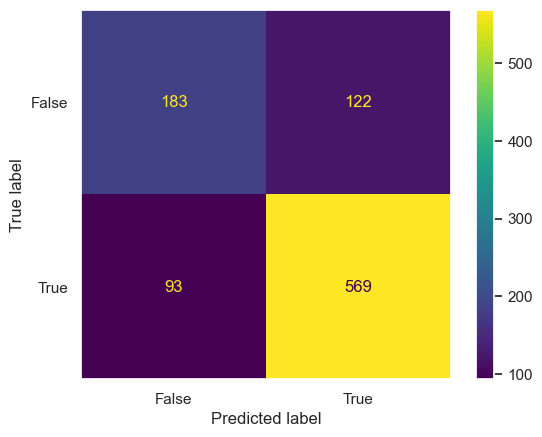

True negative: 183
False postive: 122
False negative: 93
True postive: 569


In [47]:
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)


$step-7$

**ROC-AUC curve**

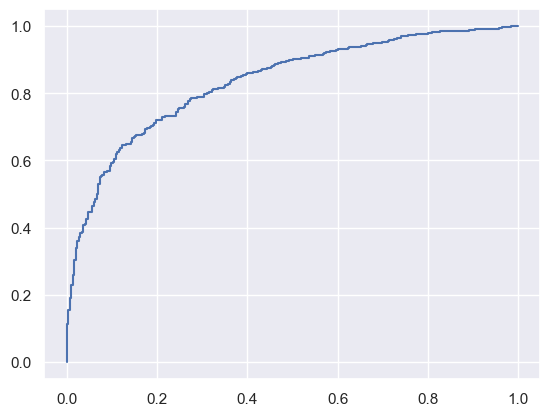

In [48]:
y_log_pred_prob=logtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

In [65]:
calc=["Accuracy","F1_score","Precision","Recall"]
val=[acc_log,f1_log,precision_log,recall_log]
cols=["Metrics","Score"]
ind=['A','B','C','D']
pd.DataFrame(zip(calc,val),index=ind,columns=cols)

,Metrics,Score
A,Accuracy,77.77
B,F1_score,0.84
C,Precision,0.82
D,Recall,0.86


 # traning the model with random forest for more accuracy

accuray is: 82.73
F1 is: 0.88
Precision is: 0.85
Recall is: 0.9


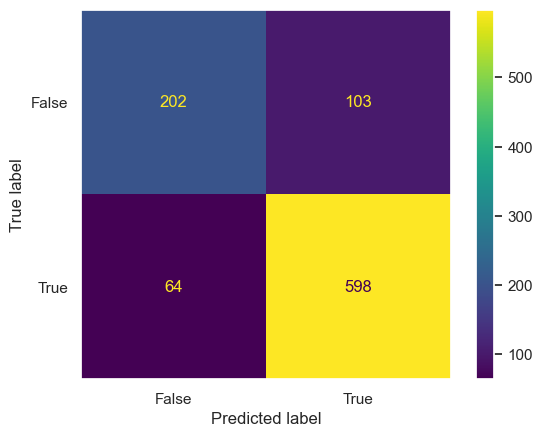

True negative: 202
False postive: 103
False negative: 64
True postive: 598


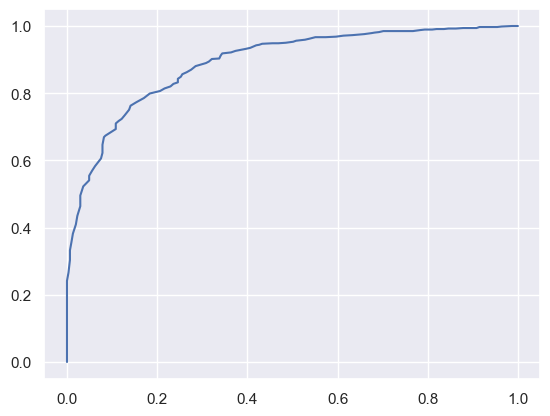

In [67]:
# ===============================Step-4:  Train the Model===================================================

from sklearn.ensemble import RandomForestClassifier
RFtree=RandomForestClassifier()
RFtree.fit(X_train, y_train)

# =============================Step-5:  Predictions============================================================

y_pred_RF=RFtree.predict(X_test)

# ============================ Step-6: Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

# ================================Step-7:Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-8: ROC-AUC curve================================================================

y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()


In [68]:
calc=["Accuracy","F1_score","Precision","Recall"]
val=[acc_RF,f1_RF,precision_RF,recall_RF]
cols=["Metrics","Score"]
ind=['A','B','C','D']
pd.DataFrame(zip(calc,val),index=ind,columns=cols)

,Metrics,Score
A,Accuracy,82.73
B,F1_score,0.88
C,Precision,0.85
D,Recall,0.90
